# ANAC


## imports

In [410]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, probplot

## set seed

In [411]:
seed = 2024
np.random.seed(seed)

## read in data

In [412]:
diet_csv = pd.read_csv("diet.csv").copy()
recipes_csv = pd.read_csv("recipes.csv").copy()
requests_csv = pd.read_csv("requests.csv").copy()
reviews_csv = pd.read_csv("reviews.csv").copy()
requests_csv

/var/folders/z0/24mzs0z565s6qpzztgbdrj780000gn/T/ipykernel_45351/3256751551.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews_csv = pd.read_csv("reviews.csv").copy()


,AuthorId,RecipeId,Time,HighCalories,HighProtein,LowFat,LowSugar,HighFiber
0,2001012259B,73440,1799.950949,0.0,Indifferent,0,0,0
1,437641B,365718,4201.820980,0.0,Yes,0,Indifferent,1
2,1803340263D,141757,6299.861496,0.0,Indifferent,1,Indifferent,0
3,854048B,280351,19801.365796,0.0,Yes,1,0,1
4,2277685E,180505,5400.093457,0.0,Indifferent,0,0,0
...,...,...,...,...,...,...,...,...
140190,163793B,78171,1560.649725,0.0,Indifferent,0,0,1
140191,33888B,333262,1502.011466,1.0,Indifferent,1,0,0
140192,401942C,49200,5999.274269,0.0,Indifferent,0,0,1
140193,346866B,214815,899.523513,0.0,Yes,1,Indifferent,1


In [413]:
diet_csv.rename(columns= {"AuthorId" : "CustomerId"}, inplace=True)
reviews_csv.rename(columns= {"AuthorId" : "CustomerId"}, inplace=True)

diet_csv["Diet"] = diet_csv["Diet"].astype("category")

recipes_csv["RecipeCategory"] = recipes_csv["RecipeCategory"].astype("category")

requests_csv.rename(columns= {
    "AuthorId" : "CustomerId",
    "Time": "MaxTime"
}, inplace=True)


# Plots

## Diet

             Count     Count%
Diet                         
Vegetarian  143383  52.732368
Omnivore     78626  28.916505
Vegan        49897  18.350760


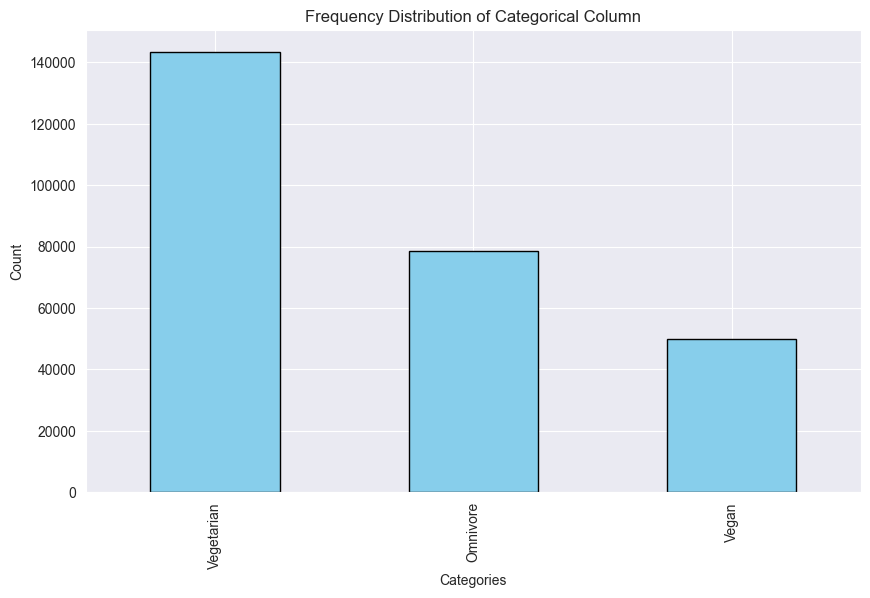

In [414]:
#diet: categorical

categorical_counts = diet_csv['Diet'].value_counts()
total_count = len(diet_csv)

# Create a frequency table with counts and percentages
frequency_table = pd.DataFrame({
    'Count': categorical_counts,
    'Count%': (categorical_counts / total_count) * 100
})

# Display the frequency table
print(frequency_table)

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
categorical_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

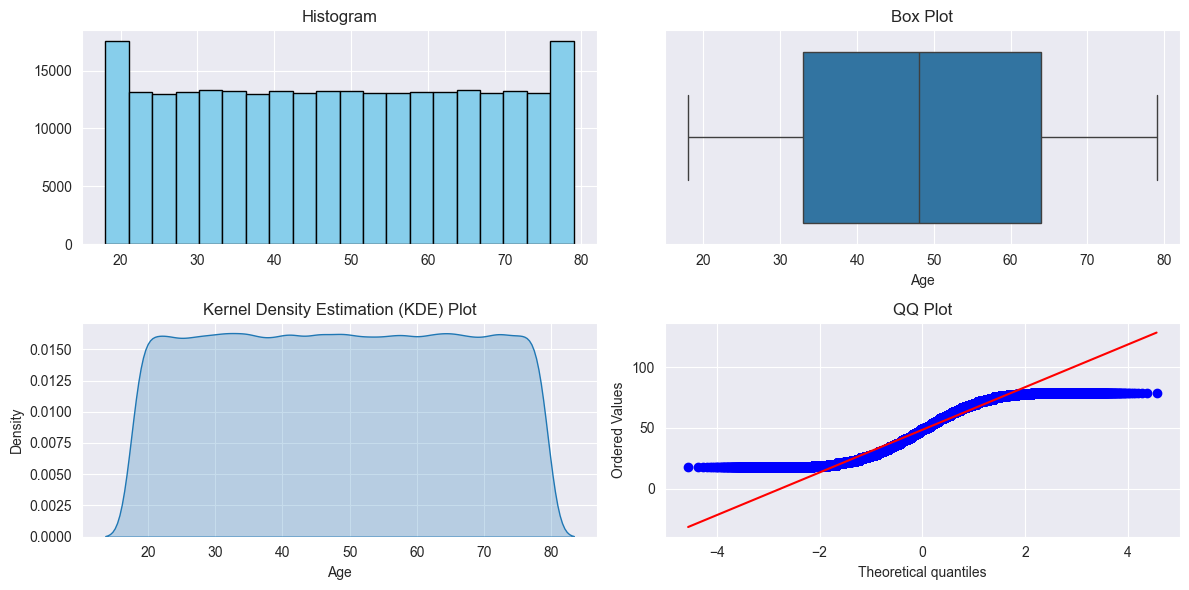

Mean: 48.503727377375355
Median: 48.0
Mode: 72
Range: 61
IQR: 31.0
Min: 18
Max: 79
Variance: 320.3418851750893
Standard Deviation: 17.898097250129393
Skewness: -0.0005303809623007354
Kurtosis: -1.2002106485243433


In [415]:
# Age: continous
continuous_data = diet_csv['Age']

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Visualization
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(2, 2, 1)
plt.hist(continuous_data, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram')

# Box Plot
plt.subplot(2, 2, 2)
sns.boxplot(x=continuous_data)
plt.title('Box Plot')

# Kernel Density Estimation (KDE) Plot
plt.subplot(2, 2, 3)
sns.kdeplot(continuous_data, fill=True)
plt.title('Kernel Density Estimation (KDE) Plot')

# QQ Plot (Quantile-Quantile Plot) for Normality
plt.subplot(2, 2, 4)
probplot(continuous_data, plot=plt)
plt.title('QQ Plot')

plt.tight_layout()
plt.show()

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

## Requests

### MaxTime

In [416]:
# Age: continous
continuous_data = requests_csv['MaxTime']

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 8435.681659901873
Median: 2399.818294762264
Mode: -2.606527872574293
Range: 17280002.70001942
IQR: 2998.1500422985773
Min: -2.606527872574293
Max: 17280000.093491547
Variance: 17630028953.657112
Standard Deviation: 132778.11925786987
Skewness: 59.53272283436475
Kurtosis: 4595.33451963597


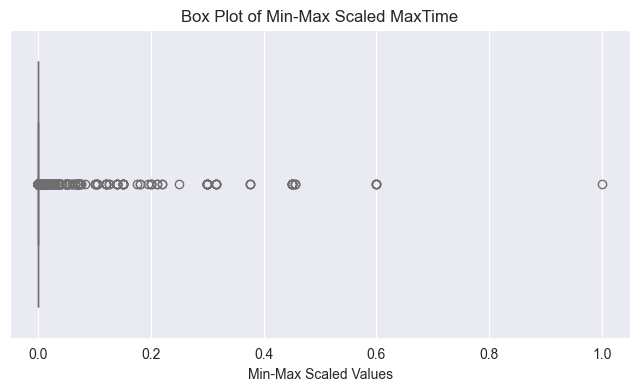

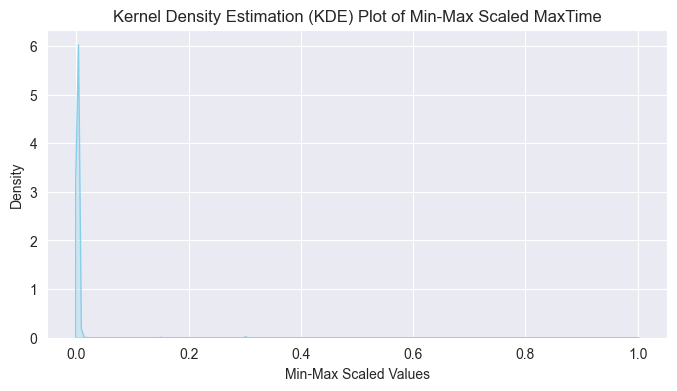

,CustomerId,RecipeId,MaxTime,HighCalories,HighProtein,LowFat,LowSugar,HighFiber
119973,1802603279A,197036,1.0,0.0,Indifferent,0,0,1


In [417]:
from sklearn.preprocessing import MinMaxScaler

column_name = 'MaxTime'
df_scaled = requests_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()

rows_with_big_value = df_scaled[df_scaled['MaxTime'] > 0.7]
rows_with_big_value

In [418]:
requests_csv["HighCalories"] = requests_csv["HighCalories"].astype("category")
requests_csv["HighProtein"] = requests_csv["HighProtein"].astype("category")
requests_csv["LowFat"] = requests_csv["LowFat"].astype("category")
requests_csv["LowSugar"] = requests_csv["LowSugar"].astype("category")
requests_csv["HighFiber"] = requests_csv["HighFiber"].astype("category")

              Count     Count%
HighCalories                  
0.0           83806  59.778166
1.0           56389  40.221834


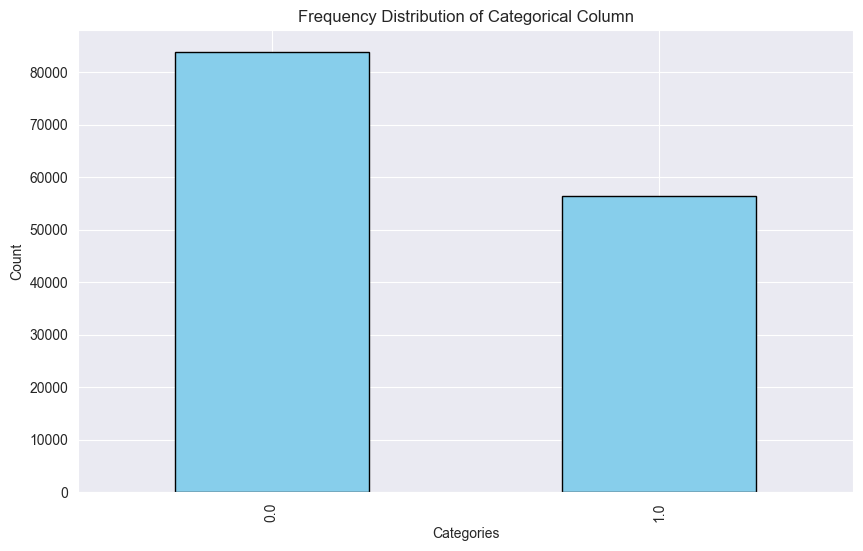

In [419]:
#diet: categorical

categorical_counts = requests_csv["HighCalories"].value_counts()
total_count = len(requests_csv)

# Create a frequency table with counts and percentages
frequency_table = pd.DataFrame({
    'Count': categorical_counts,
    'Count%': (categorical_counts / total_count) * 100
})

# Display the frequency table
print(frequency_table)

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
categorical_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

             Count     Count%
HighProtein                  
Indifferent  84244  60.090588
Yes          55951  39.909412


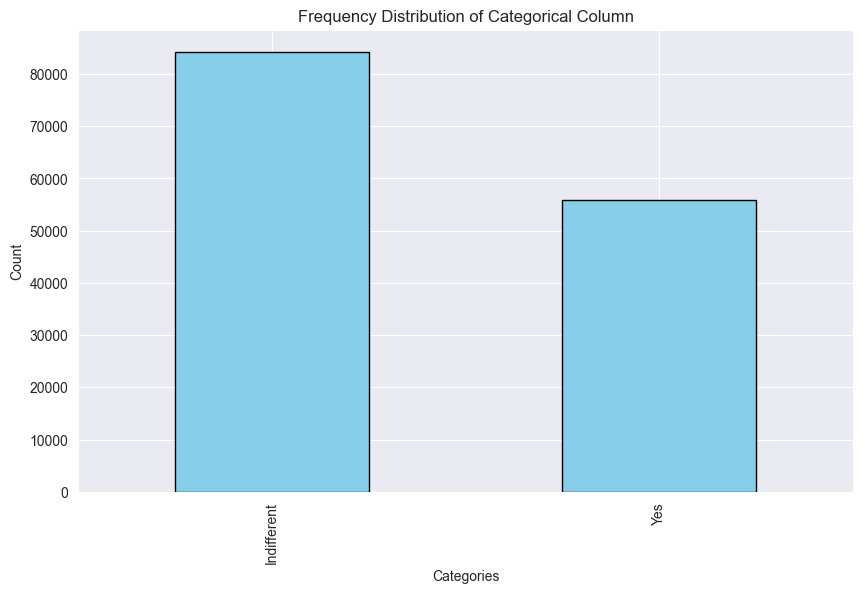

In [420]:
#diet: categorical

categorical_counts = requests_csv["HighProtein"].value_counts()
total_count = len(requests_csv)

# Create a frequency table with counts and percentages
frequency_table = pd.DataFrame({
    'Count': categorical_counts,
    'Count%': (categorical_counts / total_count) * 100
})

# Display the frequency table
print(frequency_table)

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
categorical_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

           Count    Count%
HighFiber                 
0          83956  59.88516
1          56239  40.11484


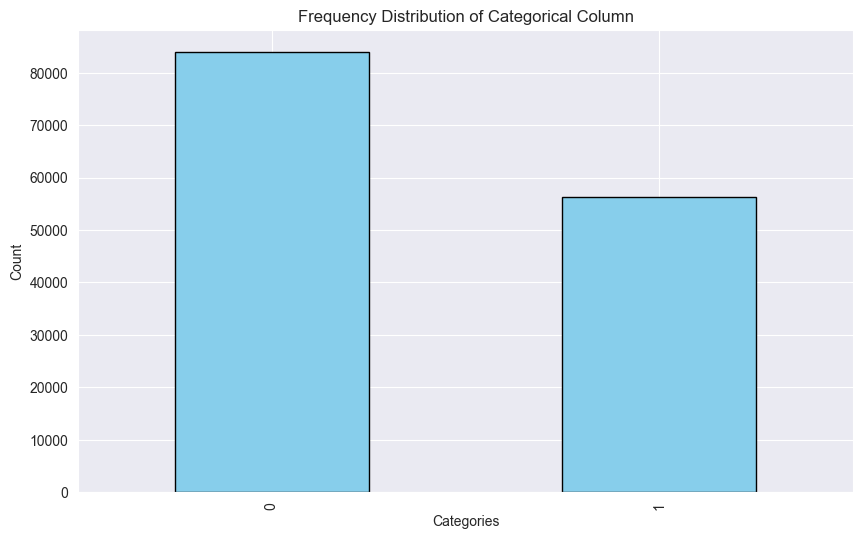

In [421]:
#diet: categorical

categorical_counts = requests_csv["HighFiber"].value_counts()
total_count = len(requests_csv)

# Create a frequency table with counts and percentages
frequency_table = pd.DataFrame({
    'Count': categorical_counts,
    'Count%': (categorical_counts / total_count) * 100
})

# Display the frequency table
print(frequency_table)

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
categorical_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

        Count     Count%
LowFat                  
0       98209  70.051714
1       41986  29.948286


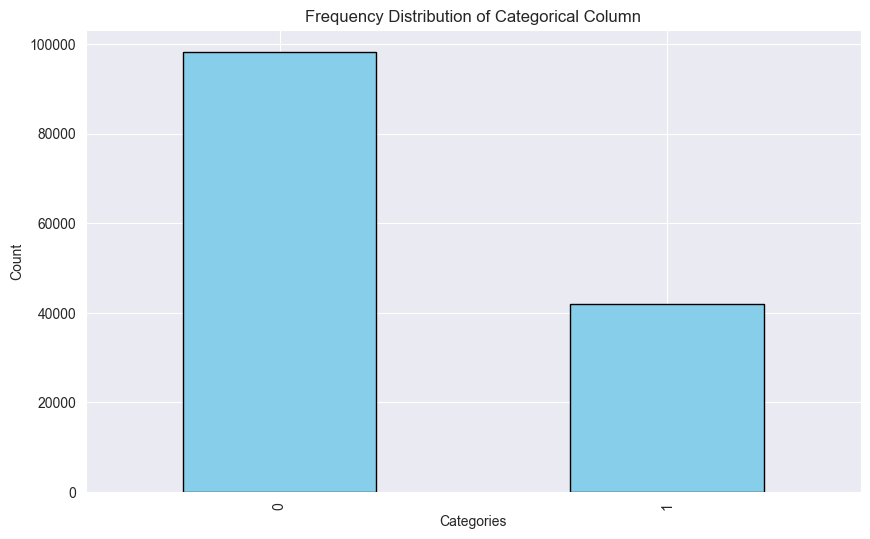

In [422]:
#diet: categorical

categorical_counts = requests_csv["LowFat"].value_counts()
total_count = len(requests_csv)

# Create a frequency table with counts and percentages
frequency_table = pd.DataFrame({
    'Count': categorical_counts,
    'Count%': (categorical_counts / total_count) * 100
})

# Display the frequency table
print(frequency_table)

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
categorical_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

             Count     Count%
LowSugar                     
0            98113  69.983238
Indifferent  42082  30.016762


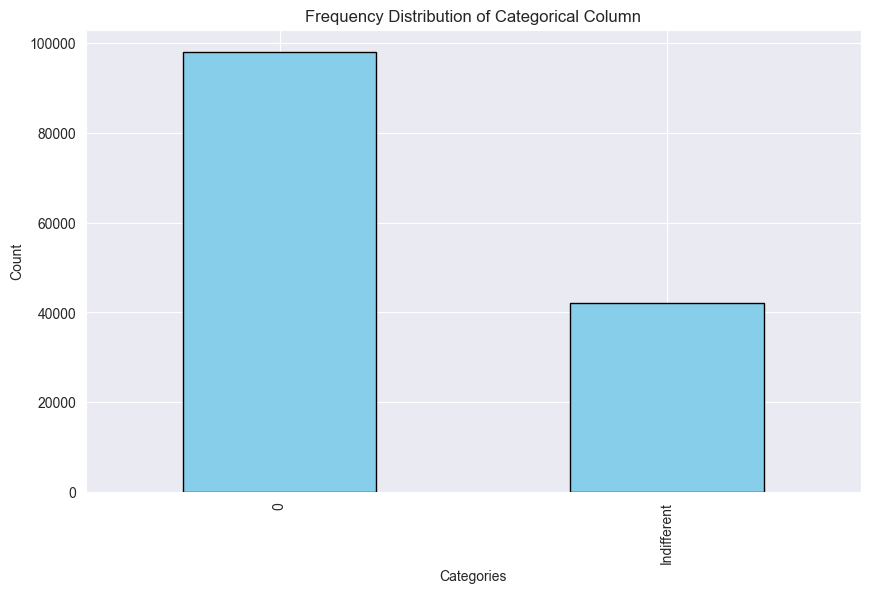

In [423]:
#diet: categorical

categorical_counts = requests_csv["LowSugar"].value_counts()
total_count = len(requests_csv)

# Create a frequency table with counts and percentages
frequency_table = pd.DataFrame({
    'Count': categorical_counts,
    'Count%': (categorical_counts / total_count) * 100
})

# Display the frequency table
print(frequency_table)

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
categorical_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

## Recipes

### Cooktime

In [424]:
# Age: continous
continuous_data = recipes_csv['CookTime']

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 5490.711073488175
Median: 1200.0
Mode: 0
Range: 10368000
IQR: 2100.0
Min: 0
Max: 10368000
Variance: 10888108005.07609
Standard Deviation: 104346.09722014566
Skewness: 62.91940490263194
Kurtosis: 4764.99552207872


In [425]:
column_name = 'CookTime'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

df_scaled

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
0,73440,Bow Ties With Broccoli Pesto,0.000000,1800,Other,"c(""\""6\"""", ""\""2\"""", ""\""1 1/2\"""", ""\""1/4\"""", ""\...","c(""\""hazelnuts\"""", ""\""broccoli florets\"""", ""\""...",241.3,10.1,1.2,0.0,13.1,31.8,2.3,1.4,6.7,9.0,NaN
1,365718,Cashew-chutney Rice,0.000347,600,Other,"c(""\""1\"""", ""\""3/4\"""", ""\""6\"""", ""\""5\"""", ""\""2\""...","c(""\""celery\"""", ""\""onion\"""", ""\""butter\"""", ""\""...",370.8,17.5,7.2,22.9,553.3,44.3,1.6,2.2,9.4,8.0,NaN
2,141757,Copycat Taco Bell Nacho Fries BellGrande,0.000347,2700,Other,"c(""\""3\"""", ""\""1/2\"""", ""\""1\"""", ""\""1\"""", ""\""3\""...","c(""\""Copycat Taco Bell Seasoned Beef\"""", ""\""ye...",377.6,20.9,10.5,45.7,1501.8,36.6,3.8,6.1,12.9,8.0,NaN
3,280351,Slow Cooker Jalapeno Cheddar Cheese Soup,0.001736,1800,Other,"c(""\""2\"""", ""\""1\"""", ""\""2\"""", ""\""2\"""", ""\""1\"""",...","c(""\""unsalted butter\"""", ""\""yellow onion\"""", ""...",282.8,16.5,10.3,50.5,630.2,22.8,2.3,2.7,11.7,6.0,NaN
4,180505,Cool & Crisp Citrus Chiffon Pie,0.000347,1800,Other,"c(""\""1\"""", ""\""1/4\"""", ""\""1/2\"""", ""\""1/2\"""", ""\...","c(""\""unflavored gelatin\"""", ""\""water\"""", ""\""su...",257.5,8.6,2.4,110.7,160.9,39.8,0.4,30.2,6.3,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,253577,Frijoles Negros- Crock Pot Mexican Black Beans,0.004167,28800,Other,"c(""\""2\"""", ""\""6 -8\"""", ""\""5\"""", ""\""1/2\"""", ""\""...","c(""\""black beans\"""", ""\""water\"""", ""\""bay leave...",121.5,0.5,0.1,0.0,1175.1,22.2,7.8,0.6,7.9,NaN,NaN
75600,267827,Moose Moussaka,0.000347,2700,Other,"c(""\""1\"""", ""\""6\"""", ""\""2\"""", ""\""2\"""", ""\""1/2\""...","c(""\""onion\"""", ""\""garlic cloves\"""", ""\""olive o...",652.2,25.8,10.7,197.9,435.5,51.9,7.5,7.2,50.1,NaN,NaN
75601,266983,Cantonese Pepper Steak for Two (Or More),0.000174,900,Other,"c(""\""1/2\"""", ""\""1\"""", ""\""1/8\"""", ""\""1/8\"""", ""\...","c(""\""top round steak\"""", ""\""cornstarch\"""", ""\""...",223.9,9.2,3.6,78.3,725.9,7.3,1.1,1.7,26.7,2.0,NaN
75602,253739,Coconut Cream Cooler,0.000029,120,Other,"c(""\""1\"""", ""\""1\"""", ""\""1\"""", ""\""7 1/2\"""", ""\""1...","c(""\""cream of coconut\"""", ""\""water\"""")",2229.8,80.3,69.3,0.0,294.7,369.0,15.7,317.9,26.7,NaN,1 gallon


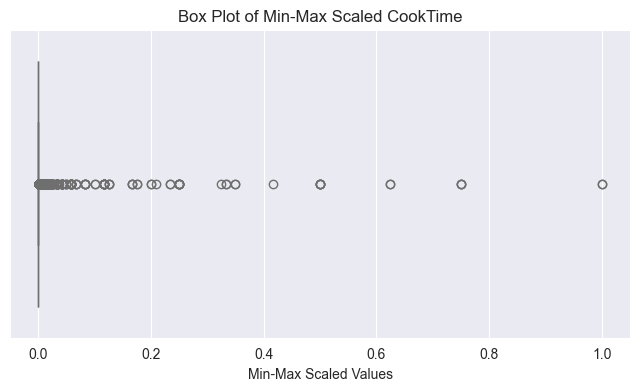

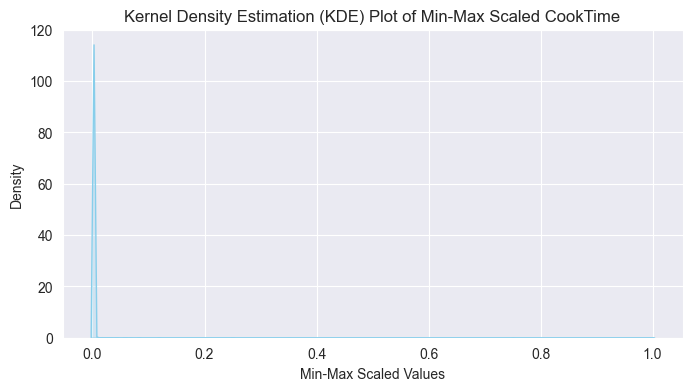

In [426]:
# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()


### Preptime

In [427]:
column_name = 'PrepTime'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

df_scaled

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
0,73440,Bow Ties With Broccoli Pesto,0,0.000104,Other,"c(""\""6\"""", ""\""2\"""", ""\""1 1/2\"""", ""\""1/4\"""", ""\...","c(""\""hazelnuts\"""", ""\""broccoli florets\"""", ""\""...",241.3,10.1,1.2,0.0,13.1,31.8,2.3,1.4,6.7,9.0,NaN
1,365718,Cashew-chutney Rice,3600,0.000035,Other,"c(""\""1\"""", ""\""3/4\"""", ""\""6\"""", ""\""5\"""", ""\""2\""...","c(""\""celery\"""", ""\""onion\"""", ""\""butter\"""", ""\""...",370.8,17.5,7.2,22.9,553.3,44.3,1.6,2.2,9.4,8.0,NaN
2,141757,Copycat Taco Bell Nacho Fries BellGrande,3600,0.000156,Other,"c(""\""3\"""", ""\""1/2\"""", ""\""1\"""", ""\""1\"""", ""\""3\""...","c(""\""Copycat Taco Bell Seasoned Beef\"""", ""\""ye...",377.6,20.9,10.5,45.7,1501.8,36.6,3.8,6.1,12.9,8.0,NaN
3,280351,Slow Cooker Jalapeno Cheddar Cheese Soup,18000,0.000104,Other,"c(""\""2\"""", ""\""1\"""", ""\""2\"""", ""\""2\"""", ""\""1\"""",...","c(""\""unsalted butter\"""", ""\""yellow onion\"""", ""...",282.8,16.5,10.3,50.5,630.2,22.8,2.3,2.7,11.7,6.0,NaN
4,180505,Cool & Crisp Citrus Chiffon Pie,3600,0.000104,Other,"c(""\""1\"""", ""\""1/4\"""", ""\""1/2\"""", ""\""1/2\"""", ""\...","c(""\""unflavored gelatin\"""", ""\""water\"""", ""\""su...",257.5,8.6,2.4,110.7,160.9,39.8,0.4,30.2,6.3,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,253577,Frijoles Negros- Crock Pot Mexican Black Beans,43200,0.001667,Other,"c(""\""2\"""", ""\""6 -8\"""", ""\""5\"""", ""\""1/2\"""", ""\""...","c(""\""black beans\"""", ""\""water\"""", ""\""bay leave...",121.5,0.5,0.1,0.0,1175.1,22.2,7.8,0.6,7.9,NaN,NaN
75600,267827,Moose Moussaka,3600,0.000156,Other,"c(""\""1\"""", ""\""6\"""", ""\""2\"""", ""\""2\"""", ""\""1/2\""...","c(""\""onion\"""", ""\""garlic cloves\"""", ""\""olive o...",652.2,25.8,10.7,197.9,435.5,51.9,7.5,7.2,50.1,NaN,NaN
75601,266983,Cantonese Pepper Steak for Two (Or More),1800,0.000052,Other,"c(""\""1/2\"""", ""\""1\"""", ""\""1/8\"""", ""\""1/8\"""", ""\...","c(""\""top round steak\"""", ""\""cornstarch\"""", ""\""...",223.9,9.2,3.6,78.3,725.9,7.3,1.1,1.7,26.7,2.0,NaN
75602,253739,Coconut Cream Cooler,300,0.000007,Other,"c(""\""1\"""", ""\""1\"""", ""\""1\"""", ""\""7 1/2\"""", ""\""1...","c(""\""cream of coconut\"""", ""\""water\"""")",2229.8,80.3,69.3,0.0,294.7,369.0,15.7,317.9,26.7,NaN,1 gallon


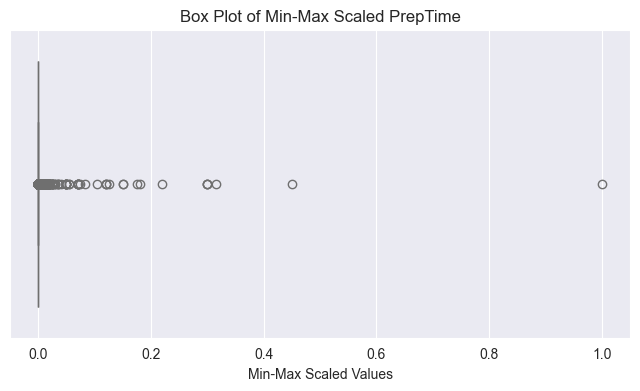

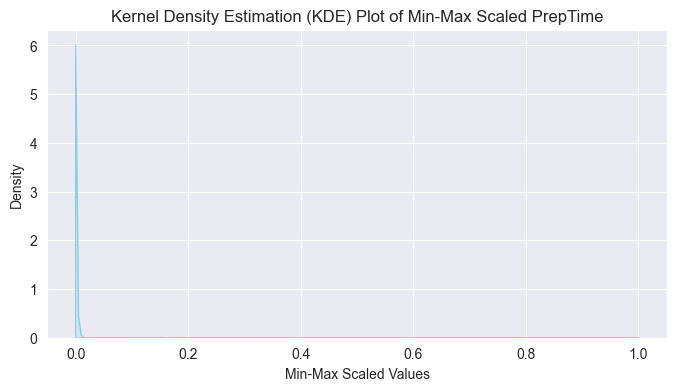

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
67689,197036,Homemade Fruit Liquers,0,1.0,Beverages,"c(""\""1\"""", ""\""3\"""", ""\""1 1/4\"""")","c(""\""berries\"""", ""\""vodka\"""", ""\""granulated su...",836.2,0.0,0.0,0.0,2.2,83.3,0.0,83.3,0.0,NaN,3 cups


In [428]:
# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()

# Filter rows where the scaled value is greater than 0.5
rows_with_big_value = df_scaled[df_scaled['PrepTime'] > 0.6]
rows_with_big_value


### RecipeCategory

                Count     Count%
RecipeCategory                  
Other           56347  74.529125
Lunch            4887   6.463944
One dish meal    4590   6.071107
Bread            4246   5.616105
Breakfast        3033   4.011693
Beverages        2303   3.046135
Soup              198   0.261891


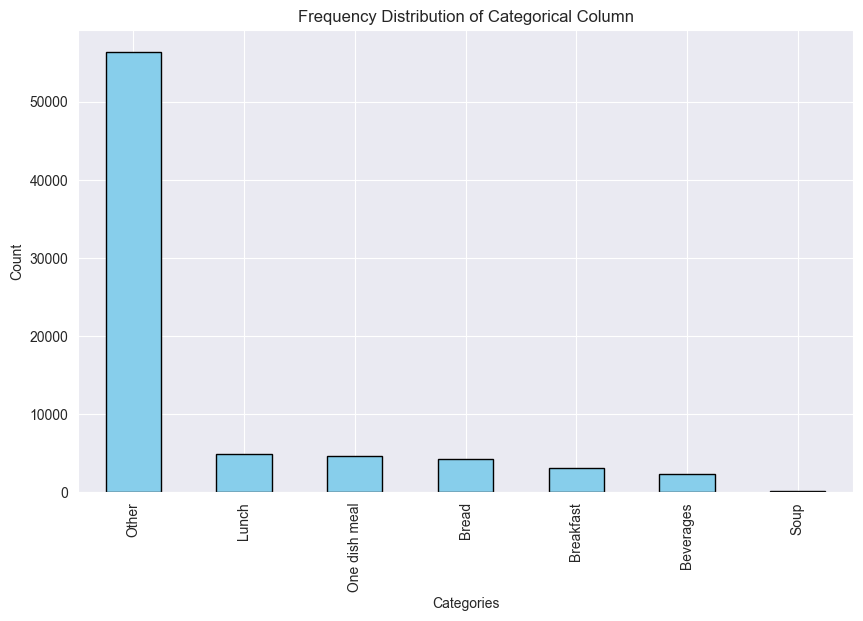

In [429]:
# recipeCategory
categorical_counts = recipes_csv["RecipeCategory"].value_counts()
total_count = len(recipes_csv)

# Create a frequency table with counts and percentages
frequency_table = pd.DataFrame({
    'Count': categorical_counts,
    'Count%': (categorical_counts / total_count) * 100
})

# Display the frequency table
print(frequency_table)

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
categorical_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

### Calories

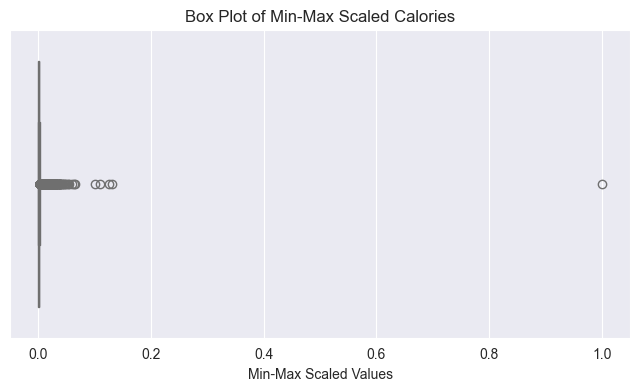

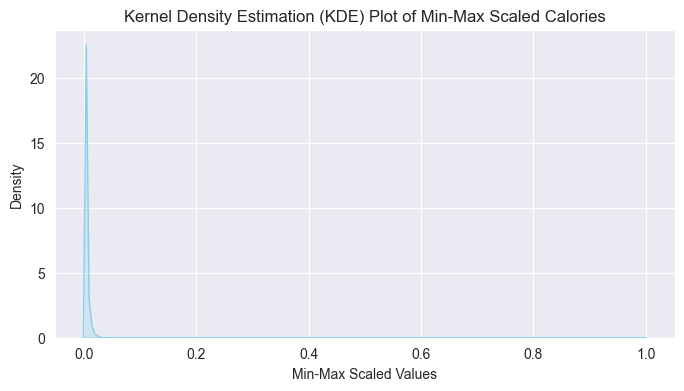

In [430]:
#Calories
column_name = 'Calories'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()


###FatContent

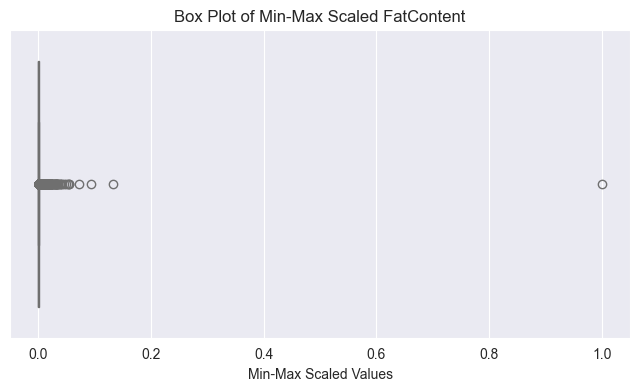

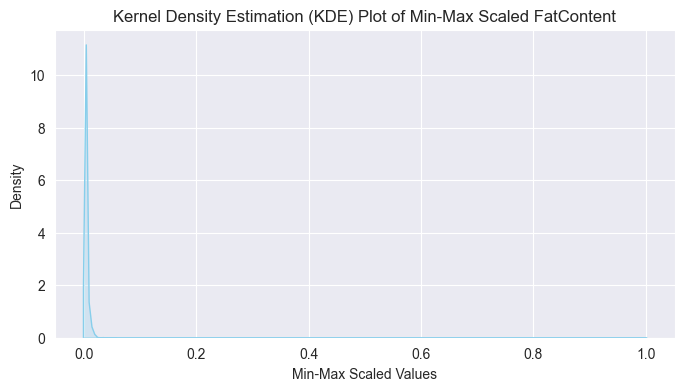

In [431]:
#Fatcontent
column_name = 'FatContent'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()


### SaturatedFatContent

In [432]:
# Age: continous
continuous_data = recipes_csv['SaturatedFatContent']

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 9.668809851330616
Median: 4.7
Mode: 0.0
Range: 13269.4
IQR: 9.3
Min: 0.0
Max: 13269.4
Variance: 2756.5415195030732
Standard Deviation: 52.50277630281158
Skewness: 214.03903581910782
Kurtosis: 53821.25515279436


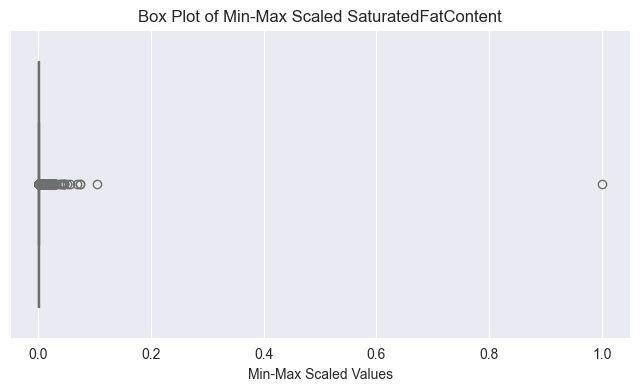

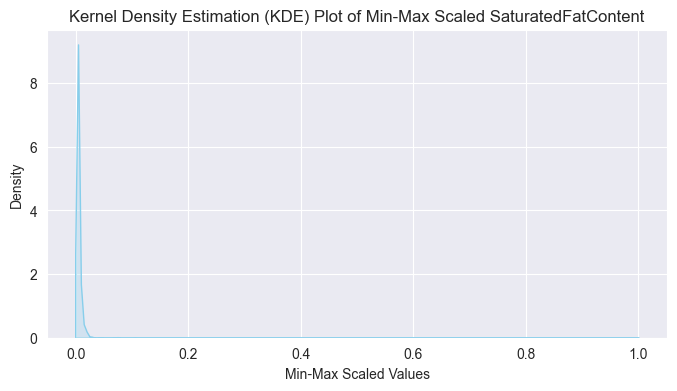

In [433]:
#SaturatedFatContent
column_name = 'SaturatedFatContent'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()


### CholesterolContent

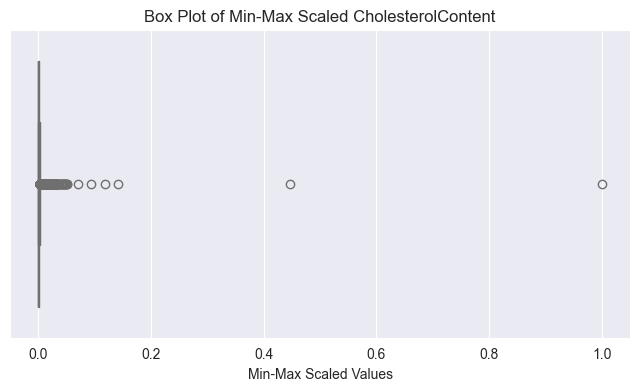

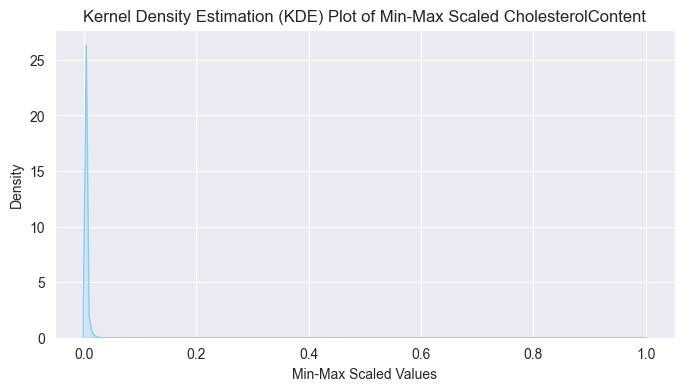

In [434]:
#CholesterolContent
column_name = 'CholesterolContent'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()


### SodiumContent

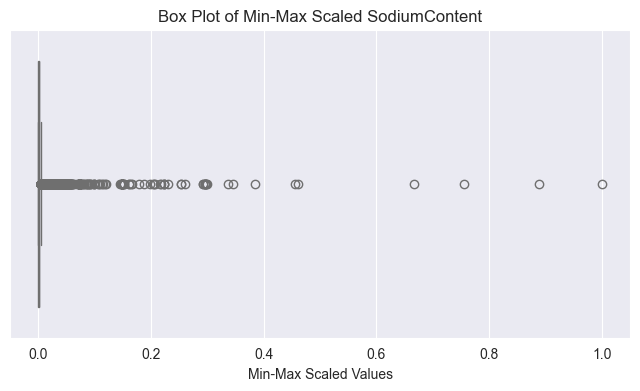

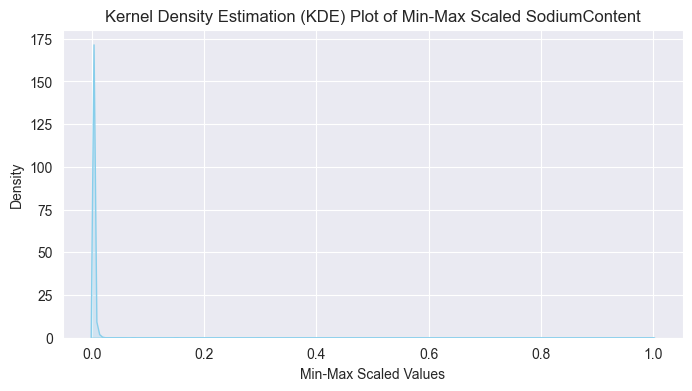

In [435]:
#SodiumContent
column_name = 'SodiumContent'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()


### CarbohydrateContent

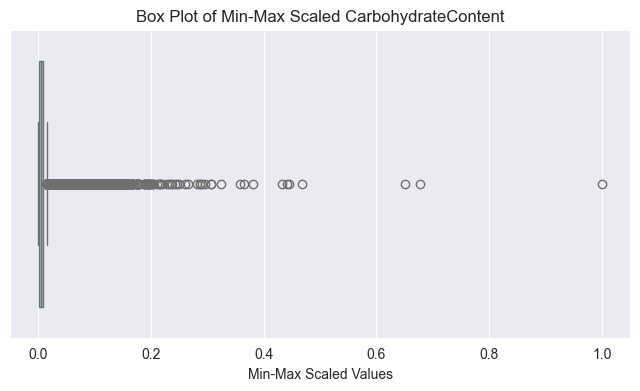

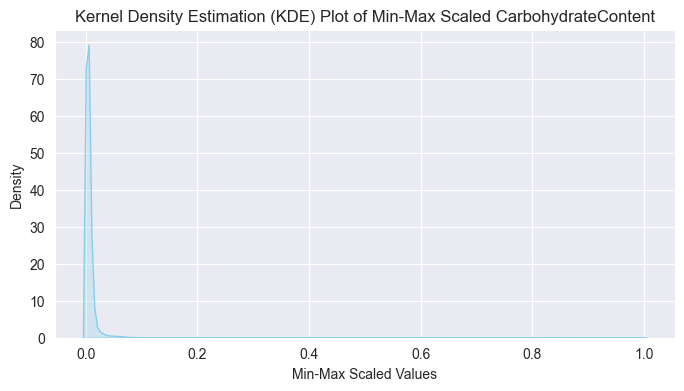

In [436]:
#CarbohydrateContent
column_name = 'CarbohydrateContent'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()


### FiberContent

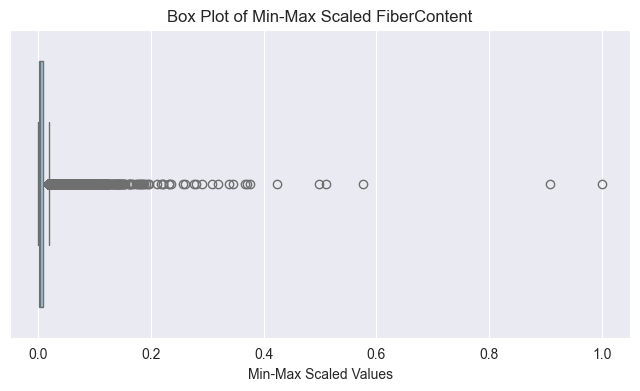

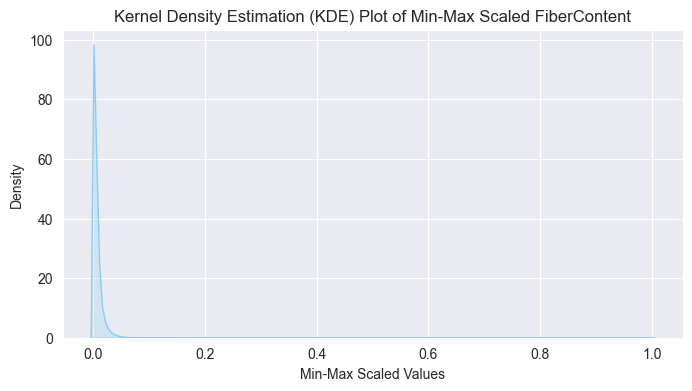

In [437]:
#FiberContent
column_name = 'FiberContent'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()


### SugarContent

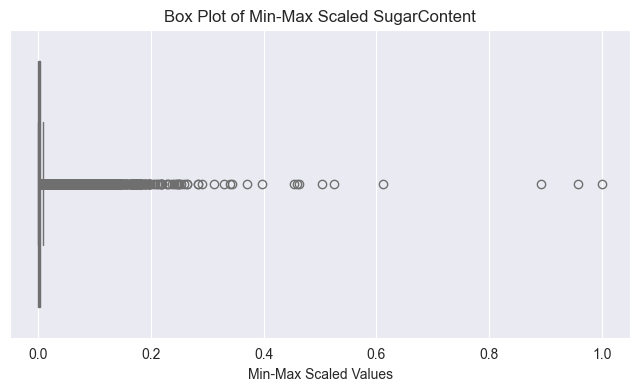

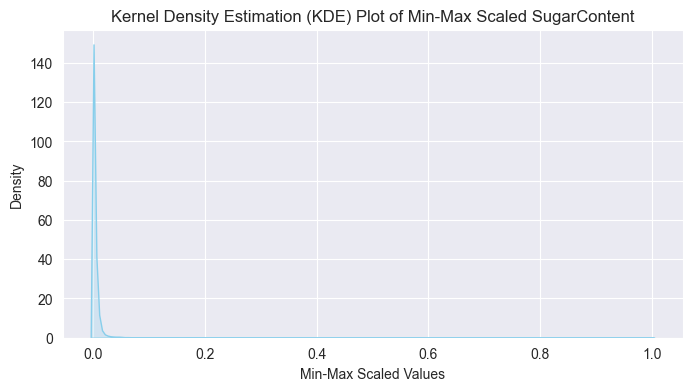

In [438]:
#SugarContent
column_name = 'SugarContent'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()


### ProteinContent

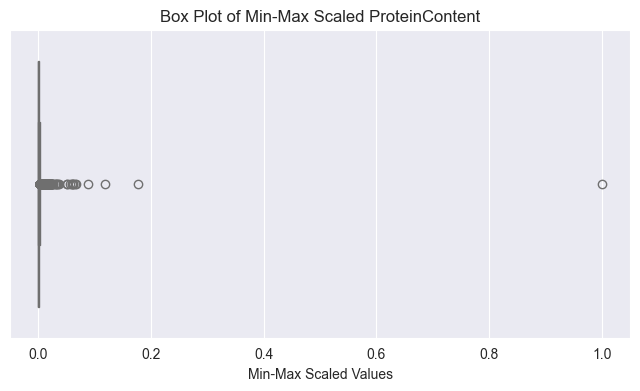

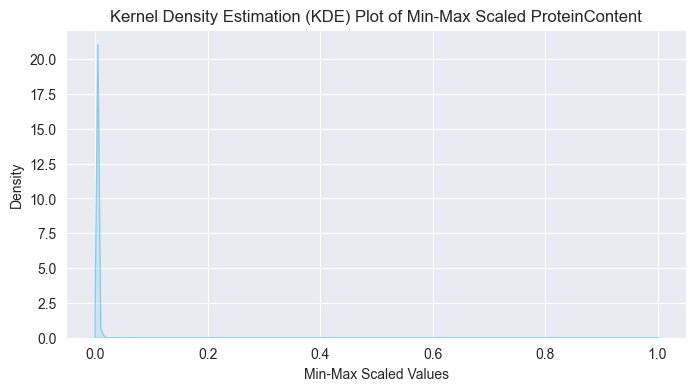

In [439]:
#ProteinContent
column_name = 'ProteinContent'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()


### FatContent

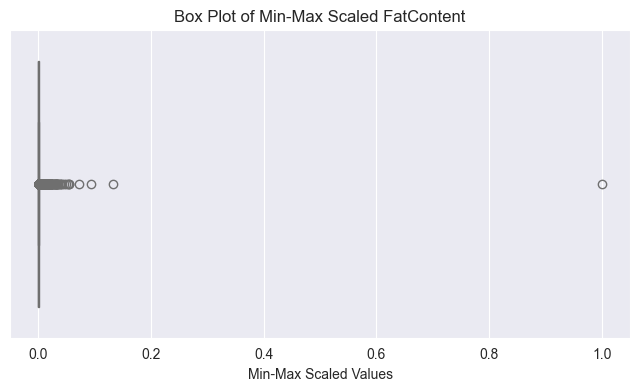

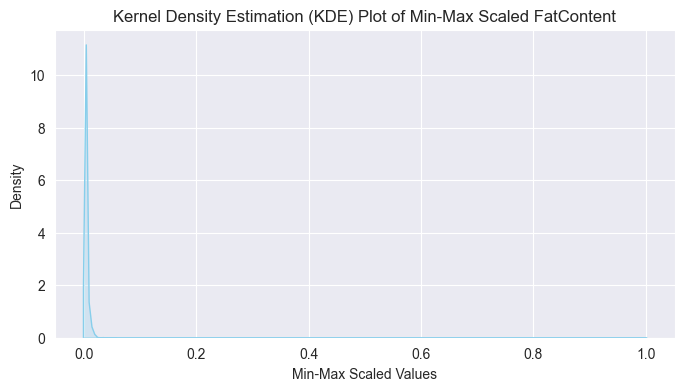

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
0,73440,Bow Ties With Broccoli Pesto,0,1800,Other,"c(""\""6\"""", ""\""2\"""", ""\""1 1/2\"""", ""\""1/4\"""", ""\...","c(""\""hazelnuts\"""", ""\""broccoli florets\"""", ""\""...",241.3,0.000335,1.2,0.0,13.1,31.8,2.3,1.4,6.7,9.0,NaN
1,365718,Cashew-chutney Rice,3600,600,Other,"c(""\""1\"""", ""\""3/4\"""", ""\""6\"""", ""\""5\"""", ""\""2\""...","c(""\""celery\"""", ""\""onion\"""", ""\""butter\"""", ""\""...",370.8,0.000581,7.2,22.9,553.3,44.3,1.6,2.2,9.4,8.0,NaN
2,141757,Copycat Taco Bell Nacho Fries BellGrande,3600,2700,Other,"c(""\""3\"""", ""\""1/2\"""", ""\""1\"""", ""\""1\"""", ""\""3\""...","c(""\""Copycat Taco Bell Seasoned Beef\"""", ""\""ye...",377.6,0.000694,10.5,45.7,1501.8,36.6,3.8,6.1,12.9,8.0,NaN
3,280351,Slow Cooker Jalapeno Cheddar Cheese Soup,18000,1800,Other,"c(""\""2\"""", ""\""1\"""", ""\""2\"""", ""\""2\"""", ""\""1\"""",...","c(""\""unsalted butter\"""", ""\""yellow onion\"""", ""...",282.8,0.000548,10.3,50.5,630.2,22.8,2.3,2.7,11.7,6.0,NaN
4,180505,Cool & Crisp Citrus Chiffon Pie,3600,1800,Other,"c(""\""1\"""", ""\""1/4\"""", ""\""1/2\"""", ""\""1/2\"""", ""\...","c(""\""unflavored gelatin\"""", ""\""water\"""", ""\""su...",257.5,0.000285,2.4,110.7,160.9,39.8,0.4,30.2,6.3,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,253577,Frijoles Negros- Crock Pot Mexican Black Beans,43200,28800,Other,"c(""\""2\"""", ""\""6 -8\"""", ""\""5\"""", ""\""1/2\"""", ""\""...","c(""\""black beans\"""", ""\""water\"""", ""\""bay leave...",121.5,0.000017,0.1,0.0,1175.1,22.2,7.8,0.6,7.9,NaN,NaN
75600,267827,Moose Moussaka,3600,2700,Other,"c(""\""1\"""", ""\""6\"""", ""\""2\"""", ""\""2\"""", ""\""1/2\""...","c(""\""onion\"""", ""\""garlic cloves\"""", ""\""olive o...",652.2,0.000856,10.7,197.9,435.5,51.9,7.5,7.2,50.1,NaN,NaN
75601,266983,Cantonese Pepper Steak for Two (Or More),1800,900,Other,"c(""\""1/2\"""", ""\""1\"""", ""\""1/8\"""", ""\""1/8\"""", ""\...","c(""\""top round steak\"""", ""\""cornstarch\"""", ""\""...",223.9,0.000305,3.6,78.3,725.9,7.3,1.1,1.7,26.7,2.0,NaN
75602,253739,Coconut Cream Cooler,300,120,Other,"c(""\""1\"""", ""\""1\"""", ""\""1\"""", ""\""7 1/2\"""", ""\""1...","c(""\""cream of coconut\"""", ""\""water\"""")",2229.8,0.002666,69.3,0.0,294.7,369.0,15.7,317.9,26.7,NaN,1 gallon


In [440]:
#ProteinContent
column_name = 'FatContent'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()



# Filter rows where the scaled value is greater than 0.5
rows_above_threshold = df_scaled[df_scaled['ProteinContent'] > 0.5]

rows_above_threshold

### RecipeServings

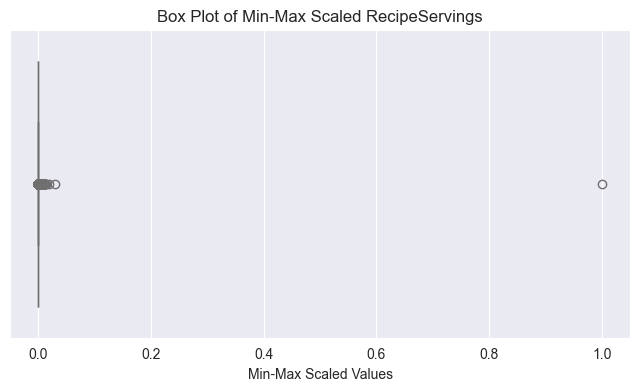

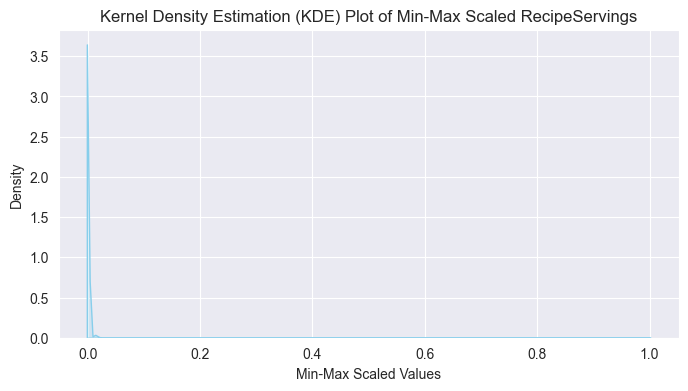

,RecipeId,Name,CookTime,PrepTime,RecipeCategory,RecipeIngredientQuantities,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
20906,41824,Alaskan Blue Stew,604800,518400,Other,"c(""\""1\"""", ""\""512\"""", ""\""2092\"""", ""\""8242\"""", ...","c(""\""unbleached flour\"""", ""\""olive oil\"""", ""\""...",127.5,0.3,0.1,5.9,45.7,27.1,4.3,3.7,5.3,1.0,NaN


In [441]:
#RecipeServings
column_name = 'RecipeServings'
df_scaled = recipes_csv.copy()

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the column
df_scaled[[column_name]] = scaler.fit_transform(df_scaled[[column_name]])

# Visualize the Min-Max scaled column using a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_scaled[column_name], color='skyblue')
plt.title(f'Box Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.show()

# Visualize the Min-Max scaled column using a KDE plot
plt.figure(figsize=(8, 4))
sns.kdeplot(df_scaled[column_name], fill=True, color='skyblue')
plt.title(f'Kernel Density Estimation (KDE) Plot of Min-Max Scaled {column_name}')
plt.xlabel('Min-Max Scaled Values')
plt.ylabel('Density')
plt.show()

# Filter rows where the scaled value is greater than 0.5
rows_with_big_value = df_scaled[df_scaled['RecipeServings'] > 0.5]
rows_with_big_value



In [442]:
#merge diet + review
reviews_csv["Like"] = reviews_csv["Like"].astype("category")
reviews_csv = reviews_csv.drop("Rating", axis=1)
reviews_csv.dropna(subset=["Like"], inplace=True) # note: now the entries are reduced to 97381 entries
reviews_csv = reviews_csv.drop("TestSetId", axis=1)
review_with_diet = pd.merge(reviews_csv, diet_csv, on="CustomerId", how="inner") # 97381 entries
#merge diet + review + request
review_diet_with_request = pd.merge(review_with_diet, requests_csv, on=["CustomerId", "RecipeId"], how="inner") # 97381 entries
df = pd.merge(review_diet_with_request, recipes_csv, on='RecipeId', how='left')

In [443]:
df

,CustomerId,RecipeId,Like,Diet,Age,MaxTime,HighCalories,HighProtein,LowFat,LowSugar,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
0,1000036C,320576,False,Vegetarian,50,119.024930,0.0,Indifferent,0,Indifferent,...,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,1.0,NaN
1,1000216B,189335,False,Vegetarian,78,1199.386790,0.0,Yes,0,0,...,19.2,4.5,33.9,714.2,38.0,0.8,4.3,16.3,8.0,NaN
2,1000221A,133043,False,Vegetarian,25,362.152341,0.0,Yes,0,Indifferent,...,13.5,1.9,0.0,0.6,1.9,0.4,0.4,0.2,NaN,4 ounces
3,1000221A,90537,False,Vegetarian,25,1198.957497,0.0,Yes,0,0,...,49.0,7.2,0.0,115.8,241.7,69.4,15.7,68.9,1.0,NaN
4,1000221A,334314,False,Vegetarian,25,5400.036634,1.0,Indifferent,0,0,...,11.0,3.1,110.0,1033.0,154.1,4.5,71.1,18.1,NaN,1 large loaf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97376,999595E,338070,False,Vegetarian,31,3899.421310,0.0,Indifferent,1,Indifferent,...,31.4,15.0,99.8,391.7,43.1,1.4,27.3,5.2,16.0,NaN
97377,999774A,29002,False,Vegetarian,57,2402.372535,0.0,Indifferent,0,Indifferent,...,33.3,8.5,33.2,318.2,107.7,10.3,13.5,32.0,4.0,NaN
97378,999774A,159252,False,Vegetarian,57,5999.598903,0.0,Yes,0,0,...,0.6,0.1,0.0,6.8,240.4,7.0,229.8,1.1,NaN,4 cups
97379,999774A,1171,True,Vegetarian,57,480.233207,1.0,Yes,0,0,...,19.8,12.2,68.3,247.4,87.5,4.0,57.8,18.2,1.0,2 mugs


In [444]:
from scipy.stats import chi2_contingency


contingency_table = pd.crosstab(df['Like'], df['RecipeYield'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association.")
else:
    print("Fail to reject the null hypothesis. There is no significant association.")



Reject the null hypothesis. There is a significant association.


In [445]:
from scipy.stats import ttest_ind

group_true = df[df['Like'] == True]['RecipeServings']
group_false = df[df['Like'] == False]['RecipeServings']

t_stat, p_value = ttest_ind(group_true, group_false)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association.")
else:
    print("Fail to reject the null hypothesis. There is no significant association.")

#maxtime, cook n prep, recipeSservings

Fail to reject the null hypothesis. There is no significant association.


# Handling missing values

## diet

In [446]:
rows_with_missing_diet = diet_csv[diet_csv['Diet'].isna()]
rows_with_missing_diet 

,CustomerId,Diet,Age
242181,646062A,NaN,63


### relationship diet and age

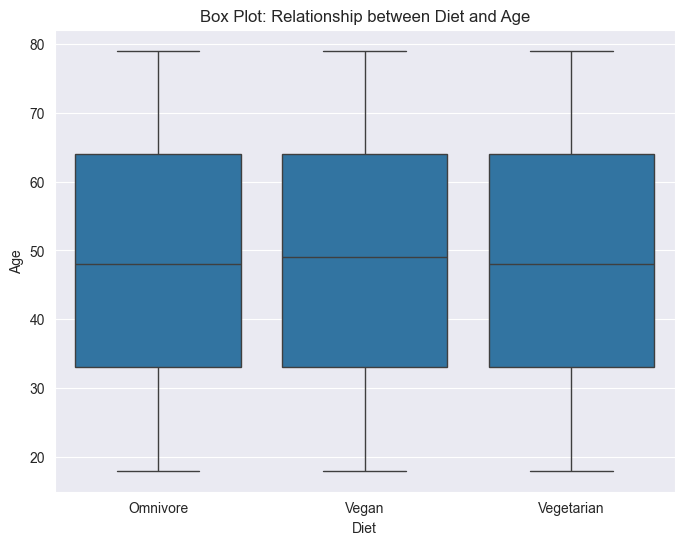

In [447]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame, 'diet' is the categorical variable, and 'age' is the continuous variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diet', y='Age', data=diet_csv)
plt.title('Box Plot: Relationship between Diet and Age')
plt.show()


In [448]:
df

,CustomerId,RecipeId,Like,Diet,Age,MaxTime,HighCalories,HighProtein,LowFat,LowSugar,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
0,1000036C,320576,False,Vegetarian,50,119.024930,0.0,Indifferent,0,Indifferent,...,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,1.0,NaN
1,1000216B,189335,False,Vegetarian,78,1199.386790,0.0,Yes,0,0,...,19.2,4.5,33.9,714.2,38.0,0.8,4.3,16.3,8.0,NaN
2,1000221A,133043,False,Vegetarian,25,362.152341,0.0,Yes,0,Indifferent,...,13.5,1.9,0.0,0.6,1.9,0.4,0.4,0.2,NaN,4 ounces
3,1000221A,90537,False,Vegetarian,25,1198.957497,0.0,Yes,0,0,...,49.0,7.2,0.0,115.8,241.7,69.4,15.7,68.9,1.0,NaN
4,1000221A,334314,False,Vegetarian,25,5400.036634,1.0,Indifferent,0,0,...,11.0,3.1,110.0,1033.0,154.1,4.5,71.1,18.1,NaN,1 large loaf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97376,999595E,338070,False,Vegetarian,31,3899.421310,0.0,Indifferent,1,Indifferent,...,31.4,15.0,99.8,391.7,43.1,1.4,27.3,5.2,16.0,NaN
97377,999774A,29002,False,Vegetarian,57,2402.372535,0.0,Indifferent,0,Indifferent,...,33.3,8.5,33.2,318.2,107.7,10.3,13.5,32.0,4.0,NaN
97378,999774A,159252,False,Vegetarian,57,5999.598903,0.0,Yes,0,0,...,0.6,0.1,0.0,6.8,240.4,7.0,229.8,1.1,NaN,4 cups
97379,999774A,1171,True,Vegetarian,57,480.233207,1.0,Yes,0,0,...,19.8,12.2,68.3,247.4,87.5,4.0,57.8,18.2,1.0,2 mugs


In [449]:
rows_with_missing_diet = df[df['Diet'].isna()]
rows_with_missing_diet

,CustomerId,RecipeId,Like,Diet,Age,MaxTime,HighCalories,HighProtein,LowFat,LowSugar,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield


In [450]:
#--> no removal needed in df but maybe for dealing with outliers might be good
# show all rows with age 63
rows_with_age_63 = df[df['Age']==63]
rows_with_age_63

,CustomerId,RecipeId,Like,Diet,Age,MaxTime,HighCalories,HighProtein,LowFat,LowSugar,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
144,1005591C,110733,False,Omnivore,63,900.274659,0.0,Indifferent,0,0,...,30.3,7.3,180.6,600.0,5.2,0.1,3.9,64.3,4.0,NaN
163,1005803E,349246,False,Omnivore,63,1500.784592,0.0,Indifferent,0,0,...,18.9,16.1,5.4,348.3,69.3,3.6,58.1,8.8,4.0,NaN
188,1007469A,38065,True,Omnivore,63,4198.789946,1.0,Indifferent,0,Indifferent,...,31.8,11.9,135.2,719.1,3.1,0.1,0.5,34.2,6.0,NaN
401,1016897E,466209,False,Vegetarian,63,4801.311530,1.0,Yes,1,Indifferent,...,6.5,3.7,45.6,396.4,70.4,1.2,47.6,3.8,12.0,NaN
480,1018823D,267528,False,Vegan,63,1500.066383,1.0,Indifferent,0,0,...,3.3,0.5,0.0,3.5,43.8,5.8,18.6,5.2,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97110,985673E,143884,False,Vegetarian,63,1500.245076,0.0,Indifferent,0,Indifferent,...,22.8,8.8,261.0,766.6,90.9,4.6,5.6,45.8,NaN,NaN
97188,986586A,132249,False,Vegetarian,63,1500.914847,0.0,Indifferent,0,0,...,99.1,18.6,0.0,1287.1,46.0,13.3,14.9,50.6,NaN,1 CUP
97311,994452E,94545,False,Omnivore,63,2100.597684,0.0,Indifferent,0,0,...,3.6,1.0,63.8,27.3,59.2,4.4,3.3,12.8,6.0,NaN
97312,994452E,372085,False,Omnivore,63,299.558719,0.0,Yes,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN


            Count     Count%
Diet                        
Vegetarian   1068  81.216730
Omnivore      155  11.787072
Vegan          92   6.996198


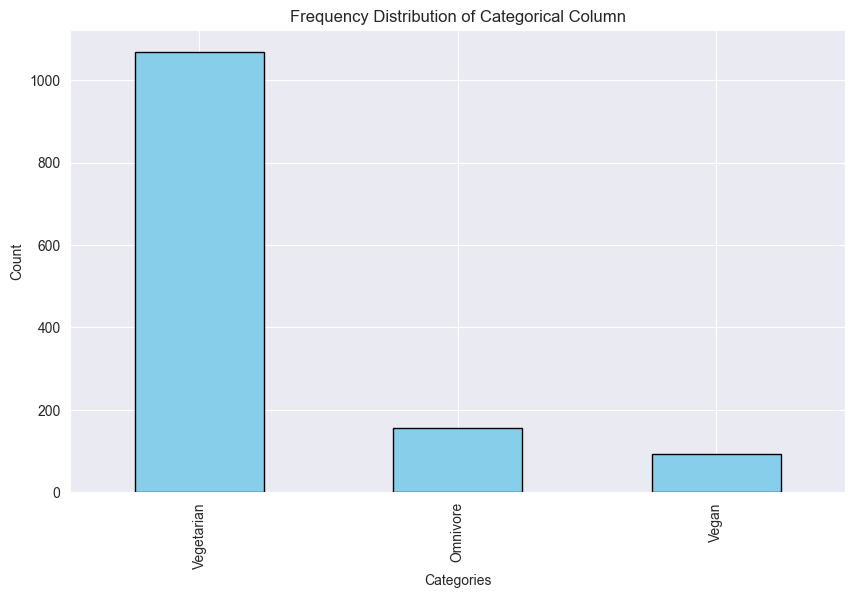

In [451]:
#diet: categorical

categorical_counts = rows_with_age_63['Diet'].value_counts()
total_count = len(rows_with_age_63)

# Create a frequency table with counts and percentages
frequency_table = pd.DataFrame({
    'Count': categorical_counts,
    'Count%': (categorical_counts / total_count) * 100
})

# Display the frequency table
print(frequency_table)

# Create a bar chart for visualization
plt.figure(figsize=(10, 6))
categorical_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Categorical Column')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()


In [452]:
diet_csv.fillna('Vegetarian', inplace=True)
diet_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271907 entries, 0 to 271906
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   CustomerId  271907 non-null  object  
 1   Diet        271907 non-null  category
 2   Age         271907 non-null  int64   
dtypes: category(1), int64(1), object(1)
memory usage: 4.4+ MB


## requests

In [453]:
requests_csv.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   CustomerId    140195 non-null  object  
 1   RecipeId      140195 non-null  int64   
 2   MaxTime       140195 non-null  float64 
 3   HighCalories  140195 non-null  category
 4   HighProtein   140195 non-null  category
 5   LowFat        140195 non-null  category
 6   LowSugar      140195 non-null  category
 7   HighFiber     140195 non-null  category
dtypes: category(5), float64(1), int64(1), object(1)
memory usage: 3.9+ MB


## recipes

In [454]:
recipes_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75604 entries, 0 to 75603
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   RecipeId                    75604 non-null  int64   
 1   Name                        75604 non-null  object  
 2   CookTime                    75604 non-null  int64   
 3   PrepTime                    75604 non-null  int64   
 4   RecipeCategory              75604 non-null  category
 5   RecipeIngredientQuantities  75604 non-null  object  
 6   RecipeIngredientParts       75604 non-null  object  
 7   Calories                    75604 non-null  float64 
 8   FatContent                  75604 non-null  float64 
 9   SaturatedFatContent         75604 non-null  float64 
 10  CholesterolContent          75604 non-null  float64 
 11  SodiumContent               75604 non-null  float64 
 12  CarbohydrateContent         75604 non-null  float64 
 13  FiberContent    

In [455]:
columns_with_missing_values = recipes_csv.columns[recipes_csv.isnull().any()].tolist()

print("Columns with Missing Values:", columns_with_missing_values)


Columns with Missing Values: ['RecipeServings', 'RecipeYield']


### RecipeServings 

In [456]:
# with mean
recipesServings_mean = recipes_csv['RecipeServings'].mean()
print("Recipeservings mean",recipesServings_mean)
print("Recipe servings max", recipes_csv['RecipeServings'].max())

Recipeservings mean 8.828455134891902
Recipe servings max 32767.0


In [457]:
#fill na rows with the mean
recipes_csv['RecipeServings'].fillna(recipesServings_mean, inplace=True)
recipesServings_mean = recipes_csv['RecipeServings'].mean()

print("Recipeservings mean",recipesServings_mean)
print("Recipe servings max", recipes_csv['RecipeServings'].max())

Recipeservings mean 8.8284551348919
Recipe servings max 32767.0


# Handling outliers

### Requests

#### maxTime

old:
an: 8435.681659901873
Median: 2399.818294762264
Mode: -2.606527872574293
Range: 17280002.70001942
IQR: 2998.1500422985773
Min: -2.606527872574293
Max: 17280000.093491547
Variance: 17630028953.657112
Standard Deviation: 132778.11925786987
Skewness: 59.53272283436475
Kurtosis: 4595.33451963597

##### option 1: inspect plot and remove or impute

In [458]:
#197036
#the row that has outlier
id_to_find= 197036

#replace by the mean
#index_to_replace = requests_csv.index[requests_csv['RecipeId'] == id_to_find]
#requests_csv.at[index_to_replace[0], 'MaxTime'] = requests_maxtime_mean
#or remove


#row_with_id = requests_csv[requests_csv['RecipeId'] == id_to_find]
#row_with_id

##### option2: apply Tukey's fences, either remove or replace by the mean/median

####### replace by the median

In [459]:
import numpy as np

column_name = 'MaxTime'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Calculate the median without outliers
median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers


In [460]:
continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 2486.3319342628633
Median: 2100.3642884665164
Mode: 2100.3642884665164
Range: 8644.150468282263
IQR: 2098.960466441584
Min: -2.606527872574293
Max: 8641.543940409689
Variance: 2833478.036479338
Standard Deviation: 1683.2938057508968
Skewness: 1.2193422647152259
Kurtosis: 1.5821327663895781


### Recipes

#### CookTime

Old:
Mean: 5490.711073488175
Median: 1200.0
Mode: 0
Range: 10368000
IQR: 2100.0
Min: 0
Max: 10368000
Variance: 10888108005.07609
Standard Deviation: 104346.09722014566
Skewness: 62.91940490263194
Kurtosis: 4764.99552207872

##### option 1: inspect plot and remove or impute


##### option 2: apply Tukey's fences, either remove or replace by the mean/median

In [461]:
df = recipes_csv
column_name = 'CookTime'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Calculate the median without outliers
median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers

In [462]:
continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 1400.408443997672
Median: 1200.0
Mode: 1200
Range: 5820
IQR: 1200.0
Min: 0
Max: 5820
Variance: 1455739.5929745694
Standard Deviation: 1206.5403403842615
Skewness: 1.0861650169532868
Kurtosis: 0.9449157694457941


#### PrepTime

In [463]:
df = recipes_csv
column_name = 'PrepTime'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers


continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 839.5238347177398
Median: 900.0
Mode: 900
Range: 2100
IQR: 600.0
Min: 0
Max: 2100
Variance: 216206.8099313507
Standard Deviation: 464.9804403750234
Skewness: 0.5305671898245302
Kurtosis: -0.08467738762828603


#### Calories

In [464]:
df = recipes_csv
column_name = 'Calories'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers

continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 339.120381196762
Median: 296.9
Mode: 296.9
Range: 1063.8
IQR: 281.40000000000003
Min: 0.0
Max: 1063.8
Variance: 48656.07552516552
Standard Deviation: 220.5812220592803
Skewness: 0.9254862393321386
Kurtosis: 0.49127181138460996


#### SaturatedFatContent

In [465]:
df = recipes_csv
column_name = 'SaturatedFatContent'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers

continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 5.830531453362255
Median: 4.1
Mode: 4.1
Range: 24.7
IQR: 7.0
Min: 0.0
Max: 24.7
Variance: 31.492606135207183
Standard Deviation: 5.611827343674
Skewness: 1.24017668653458
Kurtosis: 0.9049806934809461


#### CholesterolContent

In [466]:
df = recipes_csv
column_name = 'CholesterolContent'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers

continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 56.852640071953864
Median: 36.6
Mode: 0.0
Range: 263.8
IQR: 84.4
Min: 0.0
Max: 263.8
Variance: 3814.4746085265556
Standard Deviation: 61.76143301872582
Skewness: 1.239008250505944
Kurtosis: 0.8454326515778114


#### SodiumContent

In [467]:
df = recipes_csv
column_name = 'SodiumContent'
# Calculate IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers

continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

IQR: 673.6
Mean: 437.6406645151051
Median: 313.6
Mode: 313.6
Range: 1807.4
IQR: 511.92499999999995
Min: 0.0
Max: 1807.4
Variance: 166745.90849189216
Standard Deviation: 408.34532994989934
Skewness: 1.2390554466713346
Kurtosis: 0.928332594544206


#### SodiumContent

In [468]:
df = recipes_csv
column_name = 'CarbohydrateContent'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers


continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 30.931885879054015
Median: 25.8
Mode: 25.8
Range: 109.2
IQR: 30.599999999999998
Min: 0.0
Max: 109.2
Variance: 550.5427128552901
Standard Deviation: 23.463646623133627
Skewness: 1.0155255117211568
Kurtosis: 0.5794919633741524


##### FiberContent

In [469]:
df = recipes_csv
column_name = 'FiberContent'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers

continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 2.522986879001111
Median: 1.9
Mode: 1.9
Range: 10.0
IQR: 2.8
Min: 0.0
Max: 10.0
Variance: 4.991289364358817
Standard Deviation: 2.234119371107734
Skewness: 1.2123450419629136
Kurtosis: 0.9531522624773667


#### SugarContent

In [470]:
df = recipes_csv
column_name = 'SugarContent'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers

continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 8.6764324638908
Median: 5.3
Mode: 5.3
Range: 41.5
IQR: 8.9
Min: 0.0
Max: 41.5
Variance: 84.6249627977906
Standard Deviation: 9.19918272444844
Skewness: 1.6396715490659712
Kurtosis: 2.0597567667337957


#### ProteinContent

In [471]:
df = recipes_csv
column_name = 'ProteinContent'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers

continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 13.858412253319928
Median: 8.4
Mode: 8.4
Range: 57.5
IQR: 18.2
Min: 0.0
Max: 57.5
Variance: 184.33392307029902
Standard Deviation: 13.576962954589625
Skewness: 1.1883676308891102
Kurtosis: 0.5147569121732385


#### FatContent

In [472]:
df = recipes_csv
column_name = 'FatContent'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers

continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 15.706192794032061
Median: 12.4
Mode: 12.4
Range: 60.3
IQR: 16.700000000000003
Min: 0.0
Max: 60.3
Variance: 177.6674223656663
Standard Deviation: 13.329194362963813
Skewness: 1.1263948934556103
Kurtosis: 0.7846330320043524


#### RecipeServings

In [473]:
df = recipes_csv
column_name = 'RecipeServings'
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

median_without_outliers = np.median(df_no_outliers[column_name])

df.loc[(df[column_name] < lower_bound) | (df[column_name] > upper_bound), column_name] = median_without_outliers

continuous_data = df[column_name]

# Central Tendency
mean_value = np.mean(continuous_data)
median_value = np.median(continuous_data)
mode_value = continuous_data.mode().values[0]

# Dispersion
range_value = continuous_data.max() - continuous_data.min()
quartiles = np.percentile(continuous_data, [25, 75])
iqr = quartiles[1] - quartiles[0]
variance_value = np.var(continuous_data)
std_deviation_value = np.std(continuous_data)
skewness_value = skew(continuous_data)
kurtosis_value = kurtosis(continuous_data)

# Print results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Mode: {mode_value}")
print(f"Range: {range_value}")
print(f"IQR: {iqr}")
print(f"Min: {continuous_data.min()}")
print(f"Max: {continuous_data.max()}")
print(f"Variance: {variance_value}")
print(f"Standard Deviation: {std_deviation_value}")
print(f"Skewness: {skewness_value}")
print(f"Kurtosis: {kurtosis_value}")

Mean: 7.1360049999784065
Median: 8.0
Mode: 8.828455134891902
Range: 15.0
IQR: 4.828455134891902
Min: 1.0
Max: 16.0
Variance: 8.925992199272573
Standard Deviation: 2.987639904552182
Skewness: 0.04184925889709854
Kurtosis: 0.23003050499770739


In [474]:
#the row that has outlier
#id_to_find= 41824

#replace by the mean
#index_to_replace = recipes_csv.index[recipes_csv['RecipeId'] == id_to_find]

#recipes_csv.at[index_to_replace[0], 'RecipeServings'] = recipesServings_mean

#row_with_id = recipes_csv[recipes_csv['RecipeId'] == id_to_find]
#row_with_id

# merge tables

In [475]:
mapping_cal = {1: 1, 0.0: 0}
requests_csv['HighCalories'] = requests_csv['HighCalories'].map(mapping_cal).astype('category')

mapping_protein = {'Yes':1, 'Indifferent': 0,'No': 0,}
requests_csv['HighProtein'] = requests_csv['HighProtein'].map(mapping_protein).astype('category')

requests_csv['LowFat'] = requests_csv['LowFat'].astype('category')

mapping_sugar = {'1':1,'Indifferent': 0,'0': 0, }
requests_csv['LowSugar'] = requests_csv['LowSugar'].map(mapping_sugar).astype('category')

requests_csv['HighFiber'] = requests_csv['HighFiber'].astype('category')


In [476]:
#merge diet with review
diet_with_review = pd.merge(reviews_csv, diet_csv, on="CustomerId", how="inner")
#merge with review
diet_request_review = pd.merge(diet_with_review, requests_csv, on=["CustomerId", "RecipeId"], how="inner")

In [477]:
df = pd.merge(diet_request_review, recipes_csv, on="RecipeId", how="left")
df

,CustomerId,RecipeId,Like,Diet,Age,MaxTime,HighCalories,HighProtein,LowFat,LowSugar,...,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield
0,1000036C,320576,False,Vegetarian,50,119.024930,0,0,0,0,...,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.0,1.000000,NaN
1,1000216B,189335,False,Vegetarian,78,1199.386790,0,1,0,0,...,19.2,4.5,33.9,714.2,38.0,0.8,4.3,16.3,8.000000,NaN
2,1000221A,133043,False,Vegetarian,25,362.152341,0,1,0,0,...,13.5,1.9,0.0,0.6,1.9,0.4,0.4,0.2,8.828455,4 ounces
3,1000221A,90537,False,Vegetarian,25,1198.957497,0,1,0,0,...,49.0,7.2,0.0,115.8,25.8,1.9,15.7,8.4,1.000000,NaN
4,1000221A,334314,False,Vegetarian,25,5400.036634,1,0,0,0,...,11.0,3.1,110.0,1033.0,25.8,4.5,5.3,18.1,8.828455,1 large loaf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97376,999595E,338070,False,Vegetarian,31,3899.421310,0,0,1,0,...,31.4,15.0,99.8,391.7,43.1,1.4,27.3,5.2,16.000000,NaN
97377,999774A,29002,False,Vegetarian,57,2402.372535,0,0,0,0,...,33.3,8.5,33.2,318.2,107.7,1.9,13.5,32.0,4.000000,NaN
97378,999774A,159252,False,Vegetarian,57,5999.598903,0,1,0,0,...,0.6,0.1,0.0,6.8,25.8,7.0,5.3,1.1,8.828455,4 cups
97379,999774A,1171,True,Vegetarian,57,480.233207,1,1,0,0,...,19.8,12.2,68.3,247.4,87.5,4.0,5.3,18.2,1.000000,2 mugs


In [478]:
df = pd.get_dummies(df, columns=['Diet', 'RecipeCategory'], drop_first=True) 

In [479]:
X = df.drop(['CustomerId', 'RecipeId', 'Like', 'Name', 'RecipeIngredientQuantities', 'RecipeIngredientParts', 'RecipeYield', 'RecipeCategory_Other', ], axis=1)
y = df['Like']

In [480]:
df

,CustomerId,RecipeId,Like,Age,MaxTime,HighCalories,HighProtein,LowFat,LowSugar,HighFiber,...,RecipeServings,RecipeYield,Diet_Vegan,Diet_Vegetarian,RecipeCategory_Bread,RecipeCategory_Breakfast,RecipeCategory_Lunch,RecipeCategory_One dish meal,RecipeCategory_Other,RecipeCategory_Soup
0,1000036C,320576,False,50,119.024930,0,0,0,0,1,...,1.000000,NaN,False,True,False,False,False,False,False,False
1,1000216B,189335,False,78,1199.386790,0,1,0,0,1,...,8.000000,NaN,False,True,False,False,False,False,True,False
2,1000221A,133043,False,25,362.152341,0,1,0,0,1,...,8.828455,4 ounces,False,True,False,False,False,False,True,False
3,1000221A,90537,False,25,1198.957497,0,1,0,0,1,...,1.000000,NaN,False,True,False,True,False,False,False,False
4,1000221A,334314,False,25,5400.036634,1,0,0,0,0,...,8.828455,1 large loaf,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97376,999595E,338070,False,31,3899.421310,0,0,1,0,0,...,16.000000,NaN,False,True,False,False,False,False,True,False
97377,999774A,29002,False,57,2402.372535,0,0,0,0,0,...,4.000000,NaN,False,True,False,False,False,False,True,False
97378,999774A,159252,False,57,5999.598903,0,1,0,0,0,...,8.828455,4 cups,False,True,False,False,False,False,True,False
97379,999774A,1171,True,57,480.233207,1,1,0,0,0,...,1.000000,2 mugs,False,True,False,False,False,False,False,False


In [481]:
# split data into learning and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
  train_test_split(X, y,
                   test_size=0.3, 
                   shuffle=True,
                   random_state=3)

In [482]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=31,min_samples_leaf= 5,random_state=2024)
model.fit(X_train, y_train)
min_samples_split_value = model.min_samples_split
print("min_samples_split:", min_samples_split_value)


min_samples_split: 2


In [483]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced Accuracy:", balanced_accuracy)


Accuracy: 0.8682183809686804
Balanced Accuracy: 0.6885121969865866


In [484]:
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(model, n_estimators=100, random_state=2024)
bagging_classifier.fit(X_train, y_train)
predictions_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, predictions_bagging)
balanced_accuracy_bagging = balanced_accuracy_score(y_test, predictions_bagging)
print("Accuracy with bagging:", accuracy_bagging)
print("Balanced Accuracy with bagging:", balanced_accuracy_bagging)

Accuracy with bagging: 0.8966626732842717
Balanced Accuracy with bagging: 0.6814437500830365
